In [4]:
#-----------------------------------------------------------------------
# diagonal.py
# Author: Rebecca Barber
# 
# simulates the expected revenue given the flow discussed in meeting
# on 2/11. see notes for more details
#-----------------------------------------------------------------------

import scipy.stats as st
from statistics import *
import matplotlib.pyplot as plt
from sys import argv
import numpy as np
from math import *
import pandas as pd
from plotnine import *
from random import * 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ER draws

In [5]:
# draws value from ER curve
def er_draw():
	q = random()
	return 1/(1-q)

# draws d values from the ER curve
def draw_vals(d):
	vals = []
	for i in range(d):
		draw = er_draw()
		vals.append(draw)
	return vals

# Flow Simulation

In [6]:
# simulates flow given n bidders and m items
# essentially just arranging the n*m values and using
# the given mechanism to "star" values
def flow_sim(n, m, eps):

	# need to get n*m values
    vals = draw_vals(n*m)
    
    # divide into 2 cols
    col1 = vals[0:n]
    col2 = vals[n:len(vals)]
    assert len(col1) == len(col2), "columns aren't the same size"
    # print('\nitem 1:', col1)
    # print('item 1:', col2)
    
    # get largest "unstarred" value in each column
    # need to compute \sum_j \max_i {virt_val_ij} 
    # virt_val_ij = 0 if j is i's favorite item
    # otherwise, = formula below
    highest_virt_val_col1 = 0
    highest_virt_val_col2 = 0
    for i in range(len(col1)):
        
        val_col1 = col1[i]
        val_col2 = col2[i]
        
        max_val = val_col1 if val_col1 > val_col2 else val_col2
        other_val = val_col2 if val_col1 > val_col2 else val_col1
        
        # print('max_val:', max_val, 'other_val:', other_val)
        
        # item 1 is the favorite item (max)
        # item 2 is "other"
        if val_col1 > val_col2:
            virt_val_col1 = 0 
            virt_val_col2 = (other_val*(max_val-other_val)-eps*max_val*other_val**2)/(max_val-2*eps*max_val*other_val)
        # item 1 is "other"
        # item 2 is the favorite item (max)
        else: 
            virt_val_col2 = 0 
            virt_val_col1 = (other_val*(max_val-other_val)-eps*max_val*other_val**2)/(max_val-2*eps*max_val*other_val)
            
        # print('virt_val_col1:', virt_val_col1, 'virt_val_col2:', virt_val_col2, '\n')
            
        if virt_val_col1 > highest_virt_val_col1: 
            highest_virt_val_col1 = virt_val_col1
        if virt_val_col2 > highest_virt_val_col2: 
            highest_virt_val_col2 = virt_val_col2
            
    # print('highest_virt_val_col1:', highest_virt_val_col1, 'highest_virt_val_col2:', highest_virt_val_col2)

    return highest_virt_val_col2 + highest_virt_val_col2

# Variable Updates

In [7]:
num_trials = 10000 #200000
min_bidders = 10
max_bidders = 500 #1000
bidder_step = 10
num_items = 2
eps = 1/1000000

num_bidders = []
for i in range(min_bidders, max_bidders+1, bidder_step):
    num_bidders.append(i)
print(num_bidders)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]


# Main

In [8]:
avg_revs = []

print('number of bidders:')
for n in range(min_bidders, max_bidders+1, bidder_step):
    print(n, end = "")

    # run num_trials for each # of bidders so we can 
    # take the average
    all_revs = []
    for i in range(num_trials):
        rev = flow_sim(n, num_items, eps)
        all_revs.append(rev)       
    mean_rev = mean(all_revs)
    avg_revs.append(mean_rev)
    print(': ', mean_rev)

# save all of the data
csv_file = './data/diag_flow' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.csv'

df = pd.DataFrame(columns=['num bidders', 'avg rev'])
for i in range(len(num_bidders)):
    n = num_bidders[i]
    avg_rev = avg_revs[i]
    df = df.append({'num bidders': n, 'avg rev': avg_rev}, ignore_index=True)

df.to_csv(csv_file)

number of bidders:
10:  4.564569338790065
20:  6.43970802079402
30:  7.826675415546402
40:  9.004096206128075
50:  10.201918890094204
60:  11.412053468162846
70:  12.044644208477816
80:  13.000066992624047
90:  13.516451764652219
100:  14.641188108284132
110:  14.971462742543
120:  15.447991877529482
130:  16.87658975510104
140:  16.34344798175496
150:  17.647697167682207
160:  18.596369373012568
170:  18.664746133485327
180:  19.542714639499998
190:  19.658584787711685
200:  20.718537112565784
210:  21.00703946117251
220:  21.332378903488156
230:  21.908601897550923
240:  22.358191322539632
250:  22.94762542699039
260:  24.008698588676495
270:  23.77729325055291
280:  23.620834701260517
290:  24.264743585418568
300:  24.98763960862776
310:  24.951972017746357
320:  25.726102882769204
330:  26.357674983327772
340:  26.845841353296144
350:  26.735218250776008
360:  27.20376514719332
370:  27.69138228518884
380:  28.598934260549903
390:  28.622381955225293
400:  28.63996848250528
410:  2

# Plotting

<Figure size 648x360 with 0 Axes>

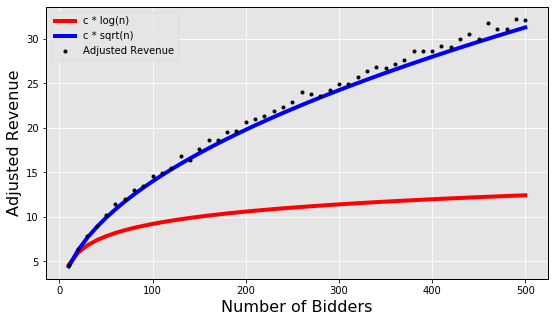

In [9]:
# plot the results
log_bench = [2*np.log(n) for n in num_bidders]
sqrt_bench = [1.4*np.sqrt(n) for n in num_bidders]

figure_name = './figures/diag_flow' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.png'

plt.style.use('ggplot')
plt.figure(figsize=(9,5))
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'}):
    plt.plot(num_bidders, log_bench, 'r-',
        num_bidders, sqrt_bench, 'b-',
         num_bidders, avg_revs,'ko', 
         markersize=3, linewidth = 4)
plt.legend(['c * log(n)', 'c * sqrt(n)', 'Adjusted Revenue'])
xlab = plt.xlabel('Number of Bidders', fontsize=16)
ylab = plt.ylabel('Adjusted Revenue', fontsize=16)
xlab.set_color('black')
ylab.set_color('black')

In [10]:
# For fitting y = B + A log x, just fit y against (log x)
# For fitting y = B + A sqrt n, just fit y against (sqrt x)
# https://stackoverflow.com/questions/3433486/how-to-do-
# exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
log_fit = np.polyfit(np.log(num_bidders), avg_revs, 1, full = True)
sqrt_fit = np.polyfit(np.sqrt(num_bidders), avg_revs, 1, full = True)
print('log fit: \na =', log_fit[0][0], '\nb =', log_fit[0][1], '\nerror =', log_fit[1][0])
print('\nsqrt fit: \na =', sqrt_fit[0][0], '\nb =', sqrt_fit[0][1], '\nerror =', sqrt_fit[1][0])

log fit: 
a = 8.163804169455645 
b = -21.240885734805506 
error = 173.0894362335794

sqrt fit: 
a = 1.4421332413369423 
b = -0.002264012993333075 
error = 4.782833046425581
